In [ ]:
### ORDINARY DIFFERENTIAL EQUATION ASSIGNMENT 1 

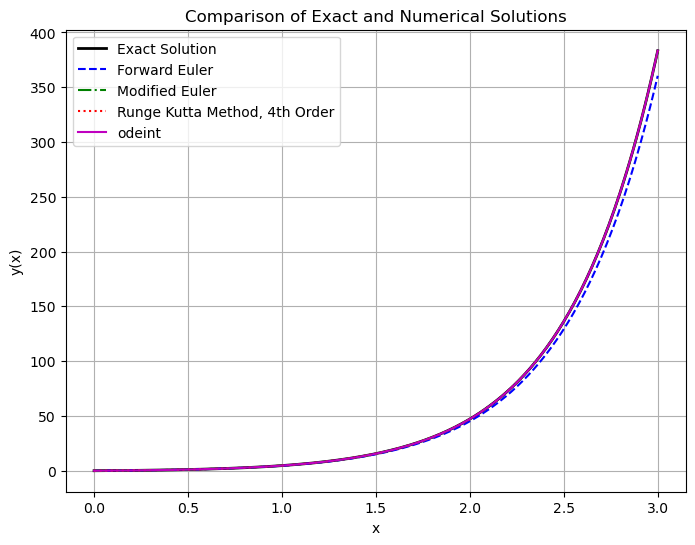

In [3]:
#Importing the packages and modules needed
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#The first function
def exact_solution(x):
    '''
    This function is used to define and returns the exact solution for the differential equation 𝑦(x) = exp(2x) - exp(x) to the values of x.
    Input : Takes in the values of x
    Output : Give the exact solution
    '''
    return np.exp(2 * x) - np.exp(x) # Defining the function 𝑦(x) = exp(2x) - exp(x)

# The second function
def ode_system(y, x):
    '''
    This function is used to define the ordinary differential equation y'' - 3y' + 2y = 0 converted to first-order system.
    Input: Takes in the values of y and x
    Output: Returns the first order linear equation which are solved numerically, it’s converted to a system of first-order ODEs:
    
    '''
    return [y[1], 3 * y[1] - 2 * y[0]]  # y' = y1, y1' = 3y1 - 2y

# Interval and step size
x0, xf, h = 0, 3, 1e-2 #Start and end points of the interval that is [0,3] and h = 0.01 step size 
x = np.arange(x0, xf + h, h)  #  Array of equally spaced points between 0 and 3, with step size h.


# Initial conditions: y(0) = 0, y'(0) = 1
y0 = [0, 1]

# (a) Forward Euler method
def forward_euler(f, y0, x):
    '''
    This function is used to create a slope at the current point to estimate the next value 
    Input : takes in the initial values and x
    Output: Give the next  values for the solution 
    '''
    y = np.zeros((len(x), len(y0))) # A array to store the next values 
    y[0] = y0 # Initial values 
    for i in range(len(x) - 1): # This for loop function is used to generate the next values 
        y[i + 1] = y[i] + h * np.array(f(y[i], x[i]))
    return y

# (b) Modified Euler method
def modified_euler(f, y0, x):
    '''
    This function is used to modify the solution given from the forward_euler using the midpoint to update the solution 
    Input: Thaes in the initial values and x 
    Output: Updated solutions using the midpoints 
    
    '''
    y = np.zeros((len(x), len(y0))) # an Array the store the next values of the modified solution 
    y[0] = y0 # Initial values 
    for i in range(len(x) - 1): # Used to generate the modified next values 
        y_mid = y[i] + 0.5 * h * np.array(f(y[i], x[i]))
        y[i + 1] = y[i] + h * np.array(f(y_mid, x[i] + 0.5 * h))
    return y

# (c) RK4 method
def rk4(f, y0, x):
    '''
    This function uses RK4 Method (Runge Kutta Method, 4th Order) to evaluate a better accurancy  using this yi+1 = y1 + h\6(k1+2k+2k3+k4)
    Input: Takes the initial values y0 and x
    Output: Give a better accurancy for the solution 
    '''
    
    y = np.zeros((len(x), len(y0))) #A array used to store next values 
    y[0] = y0 # Intial Values 
    for i in range(len(x) - 1): #for to generate the RK4
        k1 = np.array(f(y[i], x[i]))
        k2 = np.array(f(y[i] + 0.5 * h * k1, x[i] + 0.5 * h))
        k3 = np.array(f(y[i] + 0.5 * h * k2, x[i] + 0.5 * h))
        k4 = np.array(f(y[i] + h * k3, x[i] + h))
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

# (d) Python in-built function odeint
y_odeint = odeint(ode_system, y0, x) #SciPy’s built-in solver for ordinary differential equations that calls the function ode_system

# Obtain numerical solutions for the different method used by call the the created function 
y_euler = forward_euler(ode_system, y0, x) 
y_mod_euler = modified_euler(ode_system, y0, x)
y_rk4 = rk4(ode_system, y0, x)

# Plot the solutions
# to compare the exact and the pther numerical method used 
plt.figure(figsize=(8, 6)) # Setting up the figures size 
plt.plot(x, exact_solution(x), 'k-', label='Exact Solution', linewidth=2)
plt.plot(x, y_euler[:, 0], 'b--', label='Forward Euler')
plt.plot(x, y_mod_euler[:, 0], 'g-.', label='Modified Euler')
plt.plot(x, y_rk4[:, 0], 'r:', label='Runge Kutta Method, 4th Order')
plt.plot(x, y_odeint[:, 0], 'm-', label='odeint', linewidth=1.5)

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparison of Exact and Numerical Solutions')
plt.grid(True)
plt.show()


#### Interpretation 
From the graph we can see that there two method that are most realiable:
-  Forward Euler by using the slope at the midpoint.
  It is closer to the exact solution but still less accurate than RK4 or odeint.
  RK4 Method:The RK4 solution closely follows the exact solution, showing the superior accuracy of the method.
  odeint Solver:

- The odeint function adapts the step size dynamically and matches the exact solution very closely.
  It is the most reliable method in this comparison